In [433]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [434]:
credit = pd.read_excel("credit.xls", header=1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [435]:
credit = credit.rename(columns={'default payment next month': 'RISK'})


In [436]:
credit.shape

(30000, 25)

In [437]:
credit.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...

In [438]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [439]:
credit["PAY_0"]

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: PAY_0, Length: 30000, dtype: int64

In [440]:
credit.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
RISK         0
dtype: int64

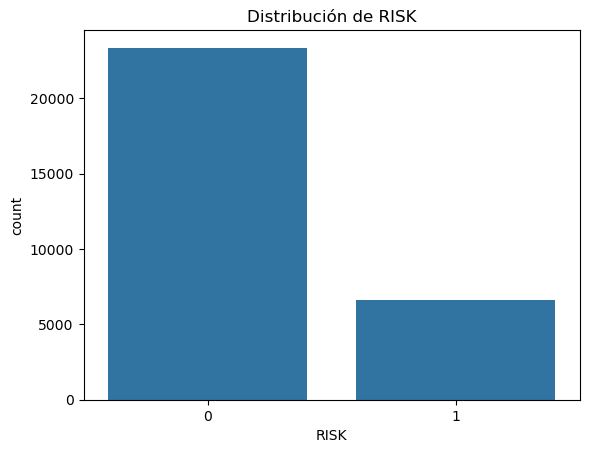

In [441]:
sns.countplot(x=credit["RISK"])
plt.title("Distribución de RISK")
plt.show()


In [442]:
numeric_cols = credit.select_dtypes(include=["int64", "float64"]).columns.tolist()

numeric_cols.remove("RISK") 
numeric_cols.remove("ID")     

numeric_cols[:10] 


['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5']

In [443]:
corr_matrix = credit[numeric_cols + ["RISK"]].corr()
corr_matrix

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RISK
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


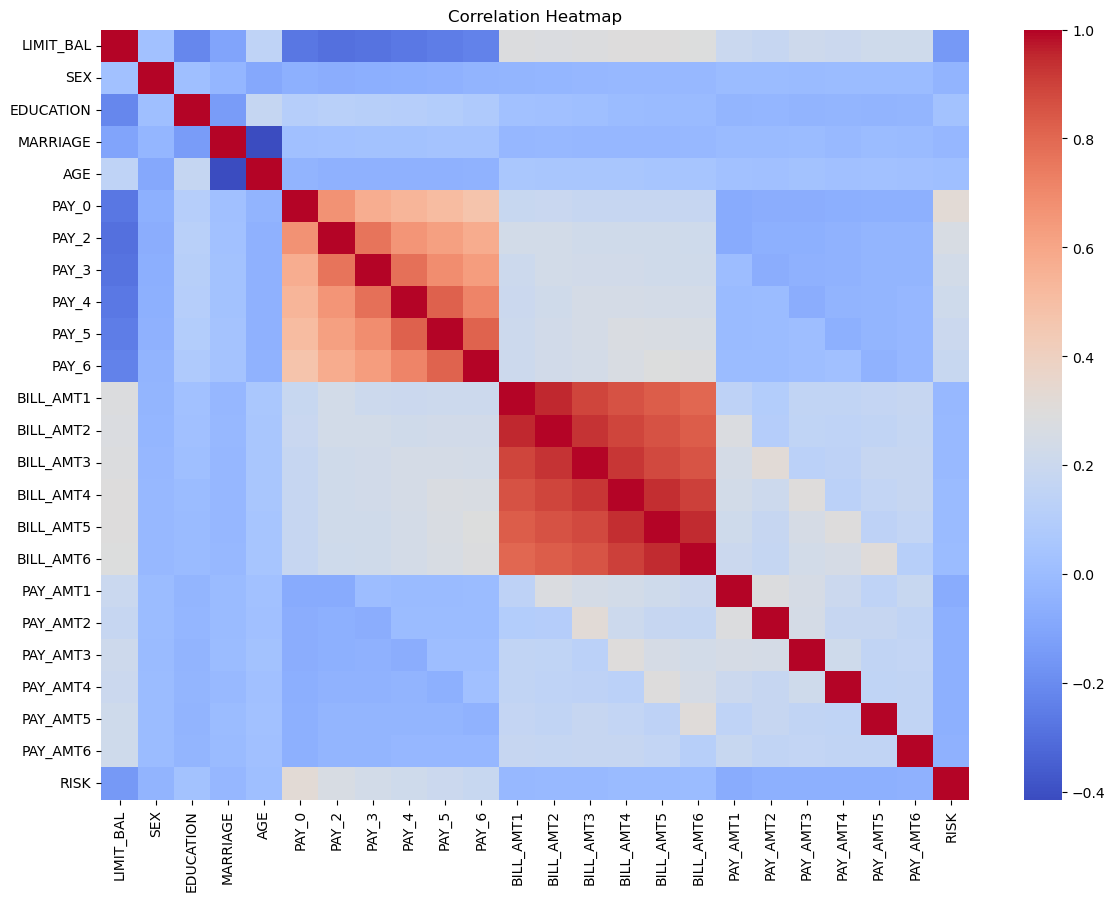

In [444]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [445]:
corr_with_target = corr_matrix["RISK"].sort_values(ascending=False)
print(corr_with_target)


RISK         1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
EDUCATION    0.028006
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
MARRIAGE    -0.024339
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
Name: RISK, dtype: float64


In [446]:
features = credit.drop(columns=['RISK', "ID"])
features.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [447]:
target = credit['RISK']
target.head()

0    1
1    1
2    0
3    0
4    0
Name: RISK, dtype: int64

In [448]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2, random_state=42, stratify=target)


In [449]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [450]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)


In [451]:
pd.Series(y_train_sm).value_counts()

RISK
0    18691
1    18691
Name: count, dtype: int64

**APLICACIÓN DE MODELOS**

*KN*

In [452]:
knn = KNeighborsClassifier()

In [453]:
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [454]:
pred_knn = knn.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [455]:
acc_knn = accuracy_score(y_test, pred_knn)
cm_knn = confusion_matrix(y_test, pred_knn)
cr_knn = classification_report(y_test, pred_knn)
print("--- KNN ---")
print("Accuracy:", acc_knn)
print("Confusion Matrix:\n", cm_knn)
print("Classification Report:\n", cr_knn)

--- KNN ---
Accuracy: 0.7775
Confusion Matrix:
 [[4665    8]
 [1327    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



In [456]:
score_knn = knn.score(X_test, y_test)
print(" Knn Score:", score_knn)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


 Knn Score: 0.7775


*REGRESIÓN LOGÍSTICA*

In [457]:
logreg = LogisticRegression(max_iter=200)

In [458]:
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=200)

In [459]:
pred_logreg = logreg.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [460]:
acc_logreg = accuracy_score(y_test, pred_logreg)
cm_logreg = confusion_matrix(y_test, pred_logreg)
cr_logreg = classification_report(y_test, pred_logreg)
print("\n--- Logistic Regression ---")
print("Accuracy:", acc_logreg)
print("Confusion Matrix:\n", cm_logreg)
print("Classification Report:\n", cr_logreg)


--- Logistic Regression ---
Accuracy: 0.7788333333333334
Confusion Matrix:
 [[4673    0]
 [1327    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [461]:
score_logreg = logreg.score(X_test, y_test)
print("Logistic Regression Score:", score_logreg)

Logistic Regression Score: 0.7788333333333334


c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


*ÁRBOL DECISIÓN*

In [462]:
tree = DecisionTreeClassifier(random_state=42)

In [463]:
tree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=42)

In [464]:
pred_tree = tree.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [465]:
acc_tree = accuracy_score(y_test, pred_tree)
cm_tree = confusion_matrix(y_test, pred_tree)
cr_tree = classification_report(y_test, pred_tree)
print("\n--- Decision Tree ---")
print("Accuracy:", acc_tree)
print("Confusion Matrix:\n", cm_tree)
print("Classification Report:\n", cr_tree)


--- Decision Tree ---
Accuracy: 0.7171666666666666
Confusion Matrix:
 [[4014  659]
 [1038  289]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83      4673
           1       0.30      0.22      0.25      1327

    accuracy                           0.72      6000
   macro avg       0.55      0.54      0.54      6000
weighted avg       0.69      0.72      0.70      6000



In [466]:
score_tree = tree.score(X_test, y_test)
print("Decision Tree Score:", score_tree)

Decision Tree Score: 0.7171666666666666


c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


**ENSAMBLE**

*BAGGING*

In [467]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [468]:
bagging_clf.fit(X_train_sm, y_train_sm)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [469]:
pred_bag = bagging_clf.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


In [470]:
acc_bagging = accuracy_score(y_test, pred_bagging)
cm_bagging = confusion_matrix(y_test, pred_bagging)
cr_bagging = classification_report(y_test, pred_bagging)
print("\n--- Bagging ---")
print("Accuracy:", acc_bagging)
print("Confusion Matrix:\n", cm_bagging)
print("Classification Report:\n", cr_bagging)


--- Bagging ---
Accuracy: 0.5221666666666667
Confusion Matrix:
 [[2659 2014]
 [ 853  474]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.57      0.65      4673
           1       0.19      0.36      0.25      1327

    accuracy                           0.52      6000
   macro avg       0.47      0.46      0.45      6000
weighted avg       0.63      0.52      0.56      6000



In [471]:
score_bagging = bagging_clf.score(X_test, y_test)
print("Bagging Score:", score_bagging)

Bagging Score: 0.6648333333333334


c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


*RANDOM FOREST*

In [472]:
rf = RandomForestClassifier(n_estimators=100,
                             max_depth=20)

In [473]:
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=20)

In [474]:
pred_rf = rf.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [475]:
acc_rf = accuracy_score(y_test, pred_rf)
cm_rf = confusion_matrix(y_test, pred_rf)
cr_rf = classification_report(y_test, pred_rf)
print("\n--- Random Forest ---")
print("Accuracy:", acc_rf)
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", cr_rf)


--- Random Forest ---
Accuracy: 0.7563333333333333
Confusion Matrix:
 [[4263  410]
 [1052  275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      4673
           1       0.40      0.21      0.27      1327

    accuracy                           0.76      6000
   macro avg       0.60      0.56      0.56      6000
weighted avg       0.71      0.76      0.73      6000



In [476]:
score_rf = rf.score(X_test, y_test)
print("Random Forest Score:", score_rf)


Random Forest Score: 0.7563333333333333


c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


*ADAPTIVE BOOSTING*

In [477]:
ada= AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)

In [478]:
ada.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [479]:
pred_ada = ada.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [480]:
acc_ada = accuracy_score(y_test, pred_ada)
cm_ada = confusion_matrix(y_test, pred_ada)
cr_ada = classification_report(y_test, pred_ada)
print("\n--- AdaBoost ---")
print("Accuracy:", acc_ada)
print("Confusion Matrix:\n", cm_ada)
print("Classification Report:\n", cr_ada)


--- AdaBoost ---
Accuracy: 0.7488333333333334
Confusion Matrix:
 [[4163  510]
 [ 997  330]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      4673
           1       0.39      0.25      0.30      1327

    accuracy                           0.75      6000
   macro avg       0.60      0.57      0.58      6000
weighted avg       0.72      0.75      0.73      6000



In [481]:
score_ada = ada.score(X_test, y_test)
print(" Ada Boost Score:", score_ada)

 Ada Boost Score: 0.7488333333333334


c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


*GRADIENT BOOSTING*

In [482]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [483]:
gb.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=42)

In [484]:
pred_gb = gb.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [485]:
acc_gb = accuracy_score(y_test, pred_gb)
cm_gb = confusion_matrix(y_test, pred_gb)
cr_gb = classification_report(y_test, pred_gb)
print("\n--- Gradient Boosting ---")
print("Accuracy:", acc_gb)
print("Confusion Matrix:\n", cm_gb)
print("Classification Report:\n", cr_gb)


--- Gradient Boosting ---
Accuracy: 0.5295
Confusion Matrix:
 [[2225 2448]
 [ 375  952]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.48      0.61      4673
           1       0.28      0.72      0.40      1327

    accuracy                           0.53      6000
   macro avg       0.57      0.60      0.51      6000
weighted avg       0.73      0.53      0.57      6000



In [486]:
score_gb = gb.score(X_test, y_test)
print("Gradient Boosting Score:", score_gb)

Gradient Boosting Score: 0.5295


c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


**3 MEJORES MODELOS PARA OPTIMIZAR**

*MODELO FINAL ADA BOOST*

In [487]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3), 
    n_estimators=200,
    learning_rate=1.0
)

In [488]:
grid_ada = {
    "n_estimators": [100, 200],
    "learning_rate": [0.5, 1.0],
    "estimator__max_depth": [2, 3],
    "estimator__min_samples_split": [2, 10]
}

In [489]:
ada_gs = GridSearchCV(
    ada,
    grid_ada,
    cv=5,
    n_jobs=-1 
)

In [490]:
ada_gs.fit(X_train_sm, y_train_sm)

print("Mejores parámetros AdaBoost:", ada_gs.best_params_)

Mejores parámetros AdaBoost: {'estimator__max_depth': 3, 'estimator__min_samples_split': 10, 'learning_rate': 1.0, 'n_estimators': 200}


In [491]:
best_ada = ada_gs.best_estimator_
pred = best_ada.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [492]:
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Accuracy: 0.532
Confusion Matrix:
 [[2214 2459]
 [ 349  978]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.47      0.61      4673
           1       0.28      0.74      0.41      1327

    accuracy                           0.53      6000
   macro avg       0.57      0.61      0.51      6000
weighted avg       0.74      0.53      0.57      6000



*MODELO FINAL DECISION TREE*

In [493]:
dt = DecisionTreeClassifier(random_state=42)

In [494]:
grid_dt = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
}

In [495]:
dt_gs = GridSearchCV(
    dt,
    grid_dt,
    cv=5,
    n_jobs=-1
)

In [496]:
dt_gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]})

In [497]:
best_dt = dt_gs.best_estimator_
pred_dt = best_dt.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [498]:
print("Best params Decision Tree:", dt_gs.best_params_)
print("Accuracy:", accuracy_score(y_test, pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dt))
print("Classification Report:\n", classification_report(y_test, pred_dt))

Best params Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7328333333333333
Confusion Matrix:
 [[4000  673]
 [ 930  397]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      4673
           1       0.37      0.30      0.33      1327

    accuracy                           0.73      6000
   macro avg       0.59      0.58      0.58      6000
weighted avg       0.71      0.73      0.72      6000



*MODELO FINAL RANDOM FOREST*

In [499]:
rf = RandomForestClassifier(random_state=42)

In [500]:
grid_rf = {
    "n_estimators": [200, 400, 600],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
}

In [501]:
rf_gs = GridSearchCV(
    rf,
    grid_rf,
    cv=5,
    n_jobs=-1
)

In [502]:
rf_gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]})

In [503]:
best_rf = rf_gs.best_estimator_
pred_rf = best_rf.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [504]:
print("Best params Random Forest:", rf_gs.best_params_)
print("Accuracy:", accuracy_score(y_test, pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_rf))
print("Classification Report:\n", classification_report(y_test, pred_rf))

Best params Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Accuracy: 0.7635
Confusion Matrix:
 [[4296  377]
 [1042  285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      4673
           1       0.43      0.21      0.29      1327

    accuracy                           0.76      6000
   macro avg       0.62      0.57      0.57      6000
weighted avg       0.72      0.76      0.73      6000



*MODELO FINAL GRADIENT BOOSTING*

In [524]:
gb = GradientBoostingClassifier(random_state=42)

In [525]:
grid_gb = {
    "n_estimators": [100, 200, 300],         
    "max_depth": [2, 3, 4],                  
    "max_leaf_nodes": [20, 50, 100, None]    
}

In [526]:
gb_gs = GridSearchCV(
    gb,
    grid_gb,
    cv=5,
    n_jobs=-1
)

In [527]:
gb_gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'max_leaf_nodes': [20, 50, 100, None],
                         'n_estimators': [100, 200, 300]})

In [528]:
best_gb = gb_gs.best_estimator_
pred_gb = best_gb.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [529]:
print("Best params Gradient Boosting:", gb_gs.best_params_)
print("Accuracy:", accuracy_score(y_test, pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_gb))
print("Classification Report:\n", classification_report(y_test, pred_gb))

Best params Gradient Boosting: {'max_depth': 4, 'max_leaf_nodes': 20, 'n_estimators': 300}
Accuracy: 0.23166666666666666
Confusion Matrix:
 [[ 141 4532]
 [  78 1249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.03      0.06      4673
           1       0.22      0.94      0.35      1327

    accuracy                           0.23      6000
   macro avg       0.43      0.49      0.20      6000
weighted avg       0.55      0.23      0.12      6000



*Randomized Search de Gradient Boosting*

In [512]:
gb = GradientBoostingClassifier(random_state=42)

In [513]:
param_dist = {
    "n_estimators": [int(x) for x in np.linspace(100, 500, 5)],         
    "max_leaf_nodes": [int(x) for x in np.linspace(20, 100, 5)],          
    "max_depth": [int(x) for x in np.linspace(2, 6, 5)]  
}                 

In [515]:
gb_rs = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=10,       
    cv=5,
    n_jobs=-1,
    random_state=42
)

In [516]:
gb_rs.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6],
                                        'max_leaf_nodes': [20, 40, 60, 80, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [ ]:
best_gb_2 = gb_rs.best_estimator_
pred_gb_2 = best_gb_2.predict(X_test)

c:\Users\Javier Soto\.anaconda\anacondapp\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print("Best params Gradient Boosting (Random Search):", gb_rs.best_params_)
print("Accuracy:", accuracy_score(y_test, pred_gb_2))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_gb_2))
print("Classification Report:\n", classification_report(y_test, pred_gb_2))

Best params Gradient Boosting (Random Search): {'n_estimators': 400, 'max_leaf_nodes': 100, 'max_depth': 6}
Accuracy: 0.26416666666666666
Confusion Matrix:
 [[ 360 4313]
 [ 102 1225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.08      0.14      4673
           1       0.22      0.92      0.36      1327

    accuracy                           0.26      6000
   macro avg       0.50      0.50      0.25      6000
weighted avg       0.66      0.26      0.19      6000



En mi caso, me decanto por Gradient Boosting como modelo principal debido a que el objetivo prioritario es identificar clientes con alto riesgo de impago, es decir, detectar de manera efectiva la clase de riesgo en el dataset. Los resultados obtenidos muestran que Gradient Boosting alcanza un recall superior al 0.9 para la clase de riesgo, lo que indica que prácticamente todos los clientes que podrían no pagar son correctamente identificados por el modelo. Este alto recall es crucial en un contexto financiero, ya que el costo de no detectar a un cliente riesgoso (falso negativo) es mucho mayor que el de marcar erróneamente a un cliente seguro como riesgo (falso positivo). Aunque la precisión y la accuracy global del modelo son relativamente bajas, estos factores resultan secundarios para el objetivo principal, ya que priorizar la detección de riesgos garantiza que el banco pueda tomar decisiones preventivas y minimizar pérdidas por impagos. Además, Gradient Boosting combina múltiples árboles en un ensemble, lo que le proporciona robustez y capacidad de aprendizaje de patrones complejos en los datos, mejorando la capacidad del modelo para distinguir entre clientes de bajo y alto riesgo. Por estas razones, Gradient Boosting representa la mejor opción para maximizar la seguridad y eficiencia en la gestión del riesgo crediticio, asegurando que se identifiquen la mayoría de los clientes que podrían generar pérdidas significativas para la institución.

In [530]:
clientes = np.array([
    [230000,1,1,1,46,2,2,2,2,2,0,193112,197039,200300,203018,199689,202833,8500,8000,7500,0,6622,20200,],
    [20000,1,2,2,30,1,2,0,0,2,0,17819,17244,18938,19836,19390,19664,0,2000,1500,0,1000,1500,]
])

In [531]:
prediccion = best_gb.predict(clientes)
proba = best_gb.predict_proba(clientes)

In [532]:
for i, p in enumerate(prediccion):
    print(f"Cliente {i+1}: Predicción clase riesgo = {p}, Probabilidad de impago = {proba[i][1]:.2f}")

Cliente 1: Predicción clase riesgo = 1, Probabilidad de impago = 0.93
Cliente 2: Predicción clase riesgo = 1, Probabilidad de impago = 0.99


**GUARDO MODELO ENTRENADO**

In [ ]:
import joblib

joblib.dump(best_gb, "modelo_gb.pkl")


['modelo_gb.pkl']